DONE bY - pregadesh.u

        Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.871

ValueError: could not convert string to float: 'Second Class'

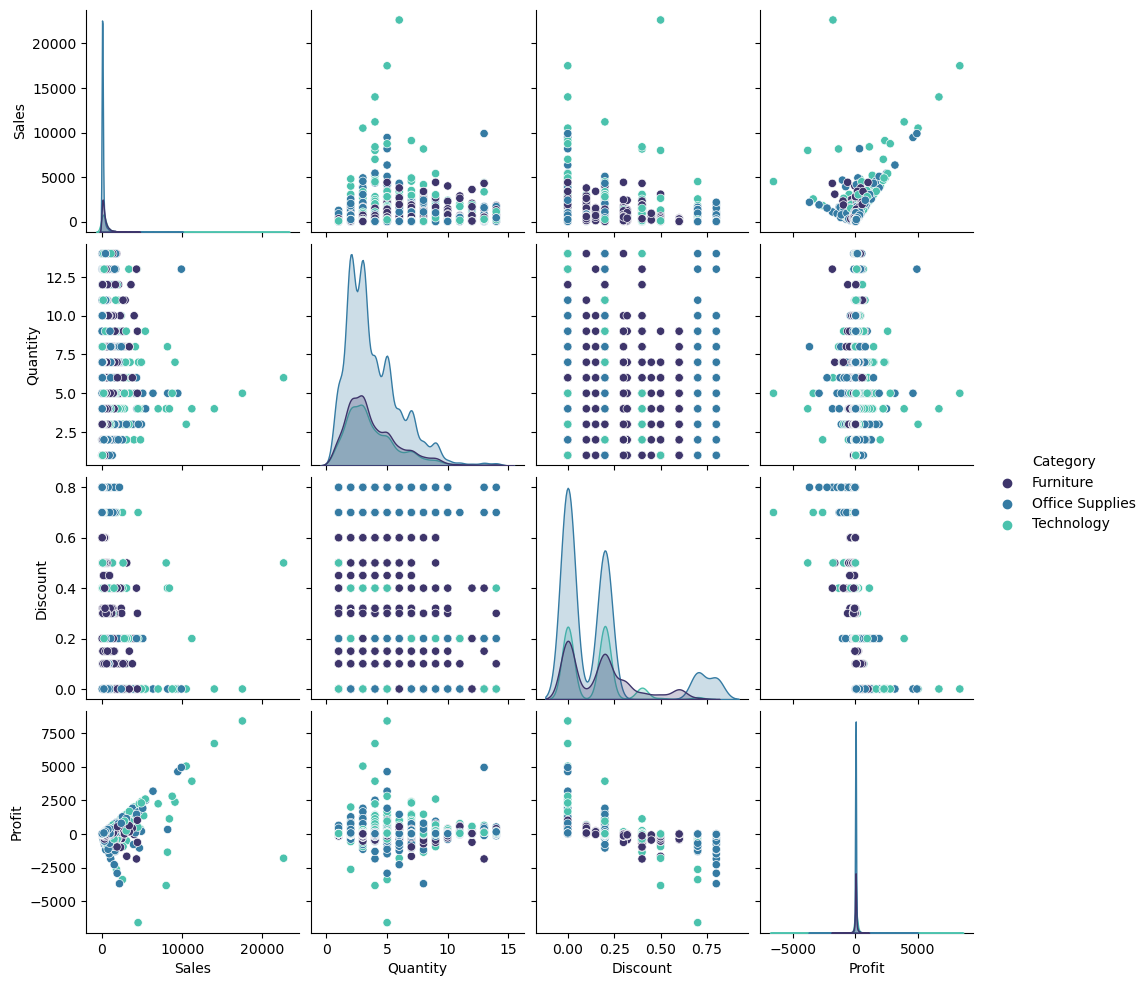

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
df = pd.read_csv("SampleSuperstore.csv")

# Display the first 5 rows of the dataframe
print(df.head(5))

# Drop the 'Postal Code' column
df = df.drop(['Postal Code'], axis=1)

# Display the shape, info, columns, and descriptive statistics of the dataframe
print(df.shape)
print(df.info())
print(df.columns)
print(df.describe().T)

# Check for duplicate values
print(df.duplicated().sum())

# Deleting duplicate values
df = df.drop_duplicates()

# Display the unique values in 'Category' and 'Sub-Category'
print(df['Category'].unique())
print(df['Sub-Category'].unique())

# Display the value counts for 'Category' and 'Sub-Category'
print(df['Category'].value_counts())
print(df['Sub-Category'].value_counts())

# Check for missing values
print(df.isnull().sum())

# Pairplot with hue based on 'Category'
sns.pairplot(df, hue='Category', diag_kind='kde', palette='mako')

# Finding the pairwise correlation
cor = df.corr()

# Visualizing correlation using heatmap
plt.subplots(figsize=(10,8))
sns.heatmap(cor, annot=True, cmap='coolwarm')
plt.show()

# Pie chart for 'Category' value counts
df['Category'].value_counts().plot(kind='pie', autopct='%1.1f%%', explode=(0.05, 0.05, 0.05))
plt.ylabel('')
plt.title('Category Distribution')
plt.show()

# Bar plot for total sales and profit by 'Category'
df.groupby('Category')[['Sales', 'Profit']].sum().plot(kind='bar', figsize=(10,6))
plt.title('Total Sales and Profit by Category')
plt.xlabel('Category')
plt.ylabel('Total')
plt.show()

# Transform sales and profit for 'Category'
transform_s = df.groupby('Category')['Sales'].sum()
transform_p = df.groupby('Category')['Profit'].sum()

# Plotting sales and profit for 'Category'
transform_s.plot(kind='bar', fontsize=10, legend=True, color='skyblue')
transform_p.plot(kind='bar', fontsize=10, color='violet', legend=True)
plt.title('Total Sales vs Profit by Category')
plt.xlabel('Category')
plt.ylabel('Total')
plt.legend(['Sales', 'Profit'])
plt.show()

# Transform sales and profit for 'Region'
transform_s = df.groupby('Region')['Sales'].sum()
transform_p = df.groupby('Region')['Profit'].sum()

# Plotting sales and profit for 'Region'
transform_s.plot(kind='bar', fontsize=10, color='pink', legend=True)
transform_p.plot(kind='bar', fontsize=10, color='black', legend=True)
plt.title('Total Sales vs Profit by Region')
plt.xlabel('Region')
plt.ylabel('Total')
plt.legend(['Sales', 'Profit'])
plt.show()

# Top 10 states by profit
Top_state = df.groupby('State').sum().reset_index().sort_values('Profit', ascending=False)
Top10_States = Top_state[:10][['State', 'Profit']]
plt.figure(figsize=(15,5))
sns.barplot(data=Top10_States, x='State', y='Profit')
plt.title('Top 10 States by Profit')
plt.show()

# Transform sales and profit for 'Sub-Category'
transform_s = df.groupby('Sub-Category')['Sales'].sum()
transform_p = df.groupby('Sub-Category')['Profit'].sum()

# Plotting sales and profit for 'Sub-Category'
plt.subplots(figsize=(15,6))
transform_s.plot(kind='bar', color='yellow', fontsize=10)
transform_p.plot(kind='bar', fontsize=10, color='black')
plt.title('Total Sales vs Profit by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Total')
plt.legend(['Sales', 'Profit'])
plt.show()

# Scatter plot of Sales vs Profit, colored by Discount
df.plot(kind='scatter', figsize=(12,7), x='Sales', y='Profit', c='Discount', cmap='winter', colorbar=True)
plt.title('Sales vs Profit with Discount')
plt.show()


THANK YOU